In [165]:
## Import Libraries
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import StringIO

In [166]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
pd.plotting.register_matplotlib_converters()
plt.style.use('seaborn-dark')

In [167]:
download_link = 'https://www.arcgis.com/sharing/rest/content/items/f10774f1c63e40168479a1feb6c7ca74/data'
# see https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6
# new source https://www.arcgis.com/home/item.html?id=f10774f1c63e40168479a1feb6c7ca74

In [168]:
req = requests.get(download_link)
rki_raw = pd.read_csv(StringIO(req.text))

In [169]:
rki_raw.tail()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1666239,1666240,16,Thüringen,LK Altenburger Land,A80+,W,5,0,2021/04/09 00:00:00,16077,"15.04.2021, 00:00 Uhr",0,-9,2021/04/09 00:00:00,-9,0,0,Nicht übermittelt
1666240,1666241,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/04/11 00:00:00,16077,"15.04.2021, 00:00 Uhr",0,-9,2021/04/11 00:00:00,-9,0,0,Nicht übermittelt
1666241,1666242,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2021/04/13 00:00:00,16077,"15.04.2021, 00:00 Uhr",1,-9,2021/04/13 00:00:00,-9,0,0,Nicht übermittelt
1666242,1666243,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/04/14 00:00:00,16077,"15.04.2021, 00:00 Uhr",1,-9,2021/04/14 00:00:00,-9,0,0,Nicht übermittelt
1666243,1666244,16,Thüringen,LK Altenburger Land,unbekannt,unbekannt,1,0,2021/04/06 00:00:00,16077,"15.04.2021, 00:00 Uhr",0,-9,2021/04/06 00:00:00,-9,0,0,Nicht übermittelt


In [170]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [171]:
rki_raw

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/09/30 00:00:00,1001,"15.04.2021, 00:00 Uhr",0,-9,2020/09/30 00:00:00,0,1,0,Nicht übermittelt
1,2,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/10/29 00:00:00,1001,"15.04.2021, 00:00 Uhr",0,-9,2020/10/29 00:00:00,0,1,0,Nicht übermittelt
2,3,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/03 00:00:00,1001,"15.04.2021, 00:00 Uhr",0,-9,2020/11/03 00:00:00,0,1,0,Nicht übermittelt
3,4,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/20 00:00:00,1001,"15.04.2021, 00:00 Uhr",0,-9,2020/11/19 00:00:00,0,1,1,Nicht übermittelt
4,5,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020/11/23 00:00:00,1001,"15.04.2021, 00:00 Uhr",0,-9,2020/11/18 00:00:00,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666239,1666240,16,Thüringen,LK Altenburger Land,A80+,W,5,0,2021/04/09 00:00:00,16077,"15.04.2021, 00:00 Uhr",0,-9,2021/04/09 00:00:00,-9,0,0,Nicht übermittelt
1666240,1666241,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/04/11 00:00:00,16077,"15.04.2021, 00:00 Uhr",0,-9,2021/04/11 00:00:00,-9,0,0,Nicht übermittelt
1666241,1666242,16,Thüringen,LK Altenburger Land,A80+,W,2,0,2021/04/13 00:00:00,16077,"15.04.2021, 00:00 Uhr",1,-9,2021/04/13 00:00:00,-9,0,0,Nicht übermittelt
1666242,1666243,16,Thüringen,LK Altenburger Land,A80+,W,1,0,2021/04/14 00:00:00,16077,"15.04.2021, 00:00 Uhr",1,-9,2021/04/14 00:00:00,-9,0,0,Nicht übermittelt


In [172]:
rki_raw_60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [173]:
rki_raw_under60 = rki_raw[~rki_raw.Altersgruppe.isin(['A60-A79', 'A80+'])].copy()

In [174]:
rki_raw_80 = rki_raw[rki_raw.Altersgruppe.isin(['A80+'])].copy()

In [175]:
rki_raw_80_death = rki_raw_80[rki_raw_80.NeuerTodesfall.isin([0, 1])].copy()

In [176]:
rki_raw_80_death.sort_values(by='Meldedatum').tail()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1047865,1047866,9,Bayern,LK Rosenheim,A80+,M,1,1,2021/04/13 00:00:00,9187,"15.04.2021, 00:00 Uhr",0,1,2021/04/13 00:00:00,-9,0,0,Nicht übermittelt
1584562,1584563,15,Sachsen-Anhalt,LK Mansfeld-Südharz,A80+,W,1,1,2021/04/13 00:00:00,15087,"15.04.2021, 00:00 Uhr",0,0,2021/04/13 00:00:00,-9,0,0,Nicht übermittelt
871673,871674,8,Baden-Württemberg,LK Enzkreis,A80+,M,1,1,2021/04/13 00:00:00,8236,"15.04.2021, 00:00 Uhr",0,1,2021/03/30 00:00:00,-9,0,1,Nicht übermittelt
1219584,1219585,9,Bayern,LK Haßberge,A80+,W,1,1,2021/04/13 00:00:00,9674,"15.04.2021, 00:00 Uhr",1,1,2021/04/05 00:00:00,-9,0,1,Nicht übermittelt
549021,549022,6,Hessen,SK Frankfurt am Main,A80+,M,1,1,2021/04/14 00:00:00,6412,"15.04.2021, 00:00 Uhr",1,1,2021/04/07 00:00:00,-9,0,1,Nicht übermittelt


In [177]:
def new_cases_by_date(rki_raw, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall'):
    """
    rki_raw: raw DataFrame from Robert Koch Institute
    """
    condition = rki_raw[rki_flag_column].isin((0, 1))
    rki_series = rki_raw[condition].groupby('Meldedatum').sum()[rki_count_columns].copy()
    rki_series.index = pd.to_datetime(rki_series.index)
    rki_series.sort_index(inplace=True)
    return rki_series

In [178]:
def process_raw_df(raw_df):
    rki_cases = new_cases_by_date(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')
    rki_death = new_cases_by_date(raw_df, rki_flag_column='NeuerTodesfall', rki_count_columns='AnzahlTodesfall')
    rki_recovered = new_cases_by_date(raw_df, rki_flag_column='NeuGenesen', rki_count_columns='AnzahlGenesen')
    rki_df = pd.concat([rki_cases, rki_death, rki_recovered], axis=1, sort=True)
    columns_dict = {'AnzahlFall': 'NewCases', 'AnzahlTodesfall': 'NewDeathRKI', 'AnzahlGenesen': 'NewRecoveredRKI'}
    rki_df.rename(columns_dict, axis=1, inplace=True)
    rki_df['Case Fatality'] = rki_df.NewDeathRKI / rki_df.NewCases * 100
    rki_df.replace(np.nan, 0, inplace=True)
    return rki_df

In [179]:
age_groups = set(rki_raw['Altersgruppe'])
age_groups

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [180]:
def rolling_average(rki_df):
    rki_df = rki_df.rolling(7).sum() / 7
    return rki_df

In [181]:
def stratify_by_age(raw_df, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall'):
    age_groups = set(raw_df['Altersgruppe'])
    age_groups_list = []
    for age_group in age_groups:
        rki_raw_age = raw_df[raw_df.Altersgruppe.isin([age_group])].copy()
        rki_cases = new_cases_by_date(rki_raw_age, rki_flag_column=rki_flag_column, rki_count_columns=rki_count_columns)
        rki_cases.name = age_group
        age_groups_list.append(rki_cases)
    age_groups_df = pd.concat(age_groups_list, axis=1, sort=True)
    age_groups_df.replace(np.nan, 0, inplace=True)
    age_groups_df = age_groups_df.rolling(7).sum() / 7
    return age_groups_df



In [182]:
rki_flag_column='NeuerFall'
rki_count_columns='AnzahlFall'
rki_raw_age2 = rki_raw[rki_raw.Altersgruppe.isin(['A00-A04'])].copy()
rki_cases2 = new_cases_by_date(rki_raw_age2)

In [183]:
age_groups_df = stratify_by_age(rki_raw)

In [184]:
age_groups_df = age_groups_df.reindex(sorted(age_groups_df.columns), axis=1)

In [185]:
age_groups_df = rolling_average(age_groups_df)

In [186]:
rki_raw_kln = rki_raw[rki_raw.Landkreis.isin(['SK Köln'])].copy()
rki_raw_kln.tail()

,FID,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
314995,314996,5,Nordrhein-Westfalen,SK Köln,A80+,M,1,0,2020/10/27 00:00:00,5315,"15.04.2021, 00:00 Uhr",0,-9,2020/10/13 00:00:00,0,1,1,Nicht übermittelt
314996,314997,5,Nordrhein-Westfalen,SK Köln,A80+,M,1,0,2020/10/27 00:00:00,5315,"15.04.2021, 00:00 Uhr",0,-9,2020/10/19 00:00:00,0,1,1,Nicht übermittelt
314997,314998,5,Nordrhein-Westfalen,SK Köln,A80+,M,2,0,2020/10/27 00:00:00,5315,"15.04.2021, 00:00 Uhr",0,-9,2020/10/27 00:00:00,0,2,0,Nicht übermittelt
314998,314999,5,Nordrhein-Westfalen,SK Köln,A80+,M,1,0,2020/10/28 00:00:00,5315,"15.04.2021, 00:00 Uhr",0,-9,2020/10/25 00:00:00,0,1,1,Nicht übermittelt
314999,315000,5,Nordrhein-Westfalen,SK Köln,A80+,M,1,0,2020/10/28 00:00:00,5315,"15.04.2021, 00:00 Uhr",0,-9,2020/10/26 00:00:00,0,1,1,Nicht übermittelt


In [187]:
rki_kln_cases = new_cases_by_date(rki_raw_kln, rki_flag_column='NeuerFall', rki_count_columns='AnzahlFall')


In [188]:
rki_kln_incidence = rki_kln_cases.rolling(7).sum() / 1017000 * 100000

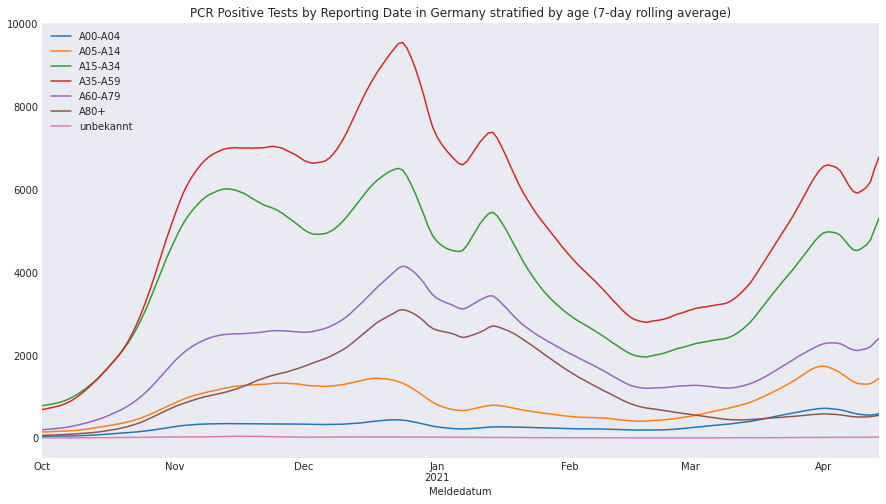

In [189]:
age_groups_df['10-01-2020':].plot()
plt.title('PCR Positive Tests by Reporting Date in Germany stratified by age (7-day rolling average)')
plt.legend(loc='upper left')

In [190]:
age_groups_df.tail(10)

,A00-A04,A05-A14,A15-A34,A35-A59,A60-A79,A80+,unbekannt
Meldedatum,,,,,,,
2021-04-05,679.795918,1570.591837,4889.979592,6441.285714,2273.040816,558.244898,15.387755
2021-04-06,656.469388,1500.204082,4770.857143,6266.959184,2223.816327,544.183673,15.000000
2021-04-07,628.591837,1425.510204,4639.734694,6086.081633,2168.204082,527.448980,15.020408
2021-04-08,600.306122,1359.346939,4539.877551,5948.510204,2124.020408,513.877551,15.265306
2021-04-09,578.755102,1316.183673,4522.673469,5908.551020,2112.448980,507.489796,15.653061
2021-04-10,565.979592,1304.612245,4580.530612,5969.346939,2131.897959,507.204082,16.816327
2021-04-11,556.693878,1299.632653,4651.918367,6042.244898,2155.938776,508.551020,18.224490
2021-04-12,553.489796,1310.755102,4778.428571,6183.265306,2201.877551,515.653061,19.938776
2021-04-13,565.836735,1368.551020,5049.244898,6512.142857,2309.755102,531.040816,22.408163


<AxesSubplot:xlabel='Meldedatum'>

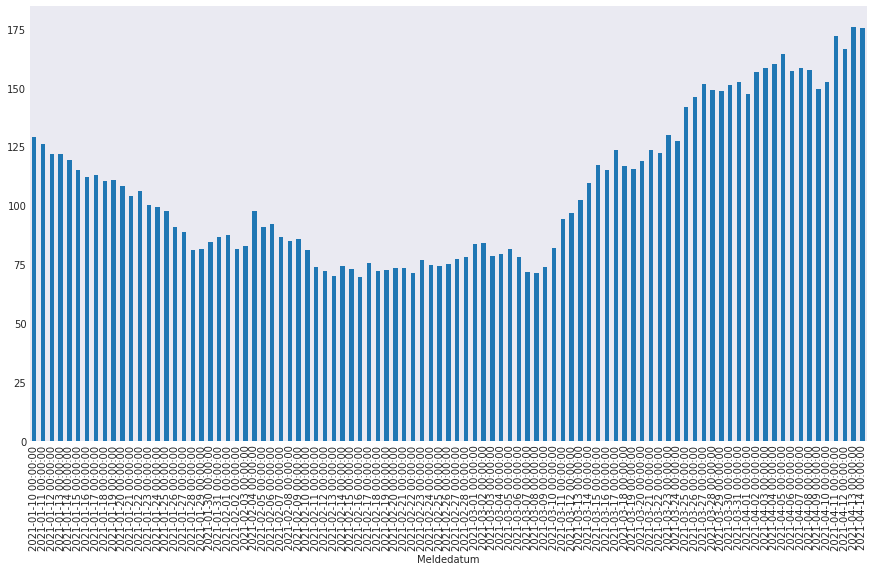

In [191]:
rki_kln_incidence['01-10-2021':].plot.bar()

In [192]:
rki_kln_incidence.tail()

Meldedatum
2021-04-10    152.212389
2021-04-11    172.074730
2021-04-12    166.371681
2021-04-13    175.712881
2021-04-14    175.221239
Name: AnzahlFall, dtype: float64

In [193]:
rki_kln = process_raw_df(rki_raw_kln)

In [194]:
rki_under60 = process_raw_df(rki_raw_60)
rki_under60.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-04-10,15080,0.0,359,0.000000
2021-04-11,7417,2.0,123,0.026965
2021-04-12,9580,2.0,143,0.020877
2021-04-13,21181,3.0,152,0.014164
2021-04-14,17001,0.0,107,0.000000


In [195]:
rki_raw_under14 = rki_raw[rki_raw.Altersgruppe.isin(['A00-A04', 'A05-A14'])].copy()
rki_under14 = process_raw_df(rki_raw_under14)
rki_under14.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-04-10,2403,0.0,64,0.0
2021-04-11,1207,0.0,16,0.0
2021-04-12,1379,0.0,21,0.0
2021-04-13,3202,0.0,22,0.0
2021-04-14,2699,0.0,20,0.0


In [196]:
rki_under14.NewDeathRKI.sum()

14.0

In [197]:
set(rki_raw['Altersgruppe'])

{'A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+', 'unbekannt'}

In [198]:
rki_raw_under80 = rki_raw[~rki_raw.Altersgruppe.isin(['A80+'])].copy()
rki_under80 = process_raw_df(rki_raw_under80)
rki_under80.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-04-10,17493,9.0,419,0.051449
2021-04-11,8549,5.0,149,0.058486
2021-04-12,11217,12.0,170,0.106980
2021-04-13,24647,9.0,187,0.036516
2021-04-14,19723,2.0,136,0.010140


In [199]:
rki_raw_60to80 = rki_raw[rki_raw.Altersgruppe.isin(['A60-A79'])].copy()
rki_60to80 = process_raw_df(rki_raw_60to80)
rki_60to80.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-04-10,2413,9.0,60.0,0.372980
2021-04-11,1132,3.0,26.0,0.265018
2021-04-12,1637,10.0,27.0,0.610874
2021-04-13,3466,6.0,35.0,0.173110
2021-04-14,2722,2.0,29.0,0.073475


In [200]:
rki = process_raw_df(rki_raw)
# using estimates for recovery dates and death dates
shift_recovery = 14 # days
shift_death = 20 # days
rki['NewRecovered'] = rki.NewRecoveredRKI.shift(shift_recovery).fillna(0)
rki['NewDeath'] = rki.NewDeathRKI.shift(shift_death).fillna(0)
s = rki['NewRecoveredRKI'].copy()
s.values[:-shift_recovery] = 0.
rki['NewRecovered'] += s
s = rki['NewDeathRKI'].copy()
s.values[:-shift_death] = 0.
rki['NewDeath'] += s
rki.fillna(value=0., inplace=True)
rki.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality,NewRecovered,NewDeath
Meldedatum,,,,,,
2021-04-10,18025,23.0,428,0.127601,11063.0,97.0
2021-04-11,8833,13.0,151,0.147175,5115.0,131.0
2021-04-12,11628,25.0,174,0.214998,7133.0,199.0
2021-04-13,25370,13.0,196,0.051242,13569.0,178.0
2021-04-14,20300,3.0,140,0.014778,16007.0,148.0


In [201]:
rki80 = process_raw_df(rki_raw_80) # only age 80+
rki80.tail()

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality
Meldedatum,,,,
2021-04-10,532,14.0,9,2.631579
2021-04-11,284,8.0,2,2.816901
2021-04-12,411,13.0,4,3.163017
2021-04-13,723,4.0,9,0.553250
2021-04-14,577,1.0,4,0.173310


Text(0.5, 1.0, 'Case Fatality Germany for cases aged 80 or above (%)')

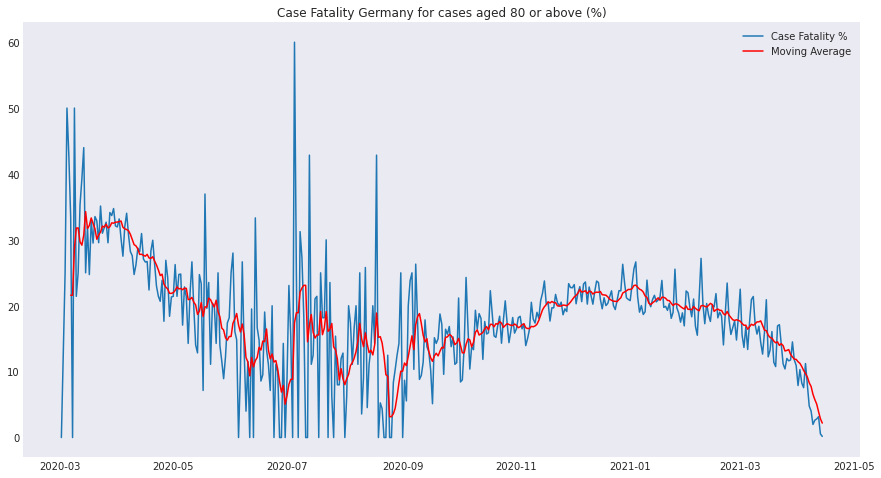

In [202]:
#rki60er['Case Fatality']['10-01-2020':].plot.bar()
start_date = '03-01-2020'
x = rki80[start_date:].index
plt.plot(x, rki80['Case Fatality'][start_date:], label='Case Fatality %')
plt.plot(x, rki80['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany for cases aged 80 or above (%)')

In [203]:
rki['Cases'] = rki['NewCases'].cumsum()
rki['Death'] = rki['NewDeath'].cumsum()
rki['Recovered'] = rki['NewRecovered'].cumsum()
rki['ActiveCases'] = rki['Cases'] - rki['Recovered'] - rki['Death']
rki['Growth'] = rki['NewCases'] / rki['ActiveCases']
rki.tail(10)

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality,NewRecovered,NewDeath,Cases,Death,Recovered,ActiveCases,Growth
Meldedatum,,,,,,,,,,,
2021-04-05,7085,53.0,1309,0.748059,7563.0,224.0,2905096,77868.0,2617313.0,209915.0,0.033752
2021-04-06,11498,67.0,1631,0.582710,15567.0,229.0,2916594,78097.0,2632880.0,205617.0,0.055920
2021-04-07,23686,55.0,2385,0.232205,18351.0,231.0,2940280,78328.0,2651231.0,210721.0,0.112405
2021-04-08,25746,48.0,1936,0.186437,16995.0,178.0,2966026,78506.0,2668226.0,219294.0,0.117404
2021-04-09,23260,30.0,1053,0.128977,15006.0,122.0,2989286,78628.0,2683232.0,227426.0,0.102275
2021-04-10,18025,23.0,428,0.127601,11063.0,97.0,3007311,78725.0,2694295.0,234291.0,0.076934
2021-04-11,8833,13.0,151,0.147175,5115.0,131.0,3016144,78856.0,2699410.0,237878.0,0.037132
2021-04-12,11628,25.0,174,0.214998,7133.0,199.0,3027772,79055.0,2706543.0,242174.0,0.048015
2021-04-13,25370,13.0,196,0.051242,13569.0,178.0,3053142,79233.0,2720112.0,253797.0,0.099962


Text(0.5, 1.0, 'Neue Fälle RKI nach Meldedatum')

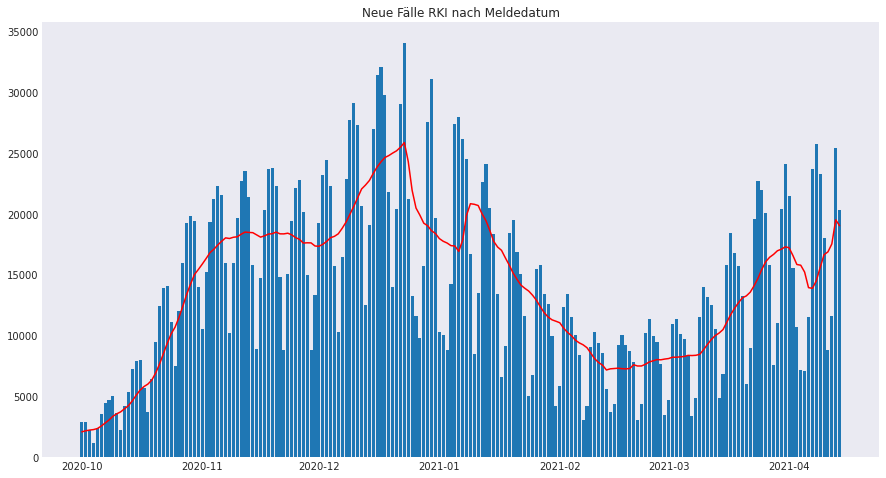

In [204]:
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki.NewCases[start_date:], label='Growth')
plt.plot(x, rki.NewCases.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.title("Neue Fälle RKI nach Meldedatum")

Text(0.5, 1.0, 'Inzidenz DE')

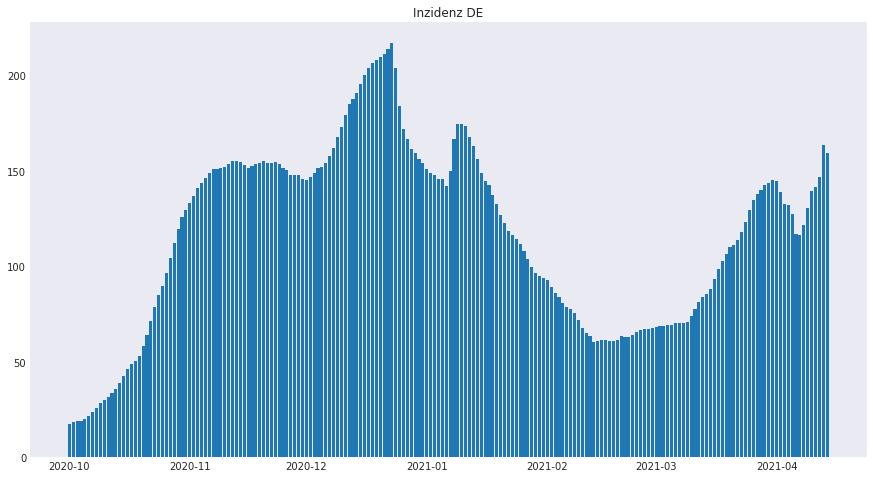

In [205]:

incidence = rki.NewCases.rolling(7).sum() /  83450000 * 100000
start_date = '10-01-2020'
x = incidence[start_date:].index
plt.bar(x, incidence[start_date:])
plt.title("Inzidenz DE")

In [206]:
incidence.tail(10)

Meldedatum
2021-04-05    127.616537
2021-04-06    116.914320
2021-04-07    116.430198
2021-04-08    121.549431
2021-04-09    130.790893
2021-04-10    139.597364
2021-04-11    141.561414
2021-04-12    147.005392
2021-04-13    163.628520
2021-04-14    159.571001
Name: NewCases, dtype: float64

<AxesSubplot:xlabel='Meldedatum'>

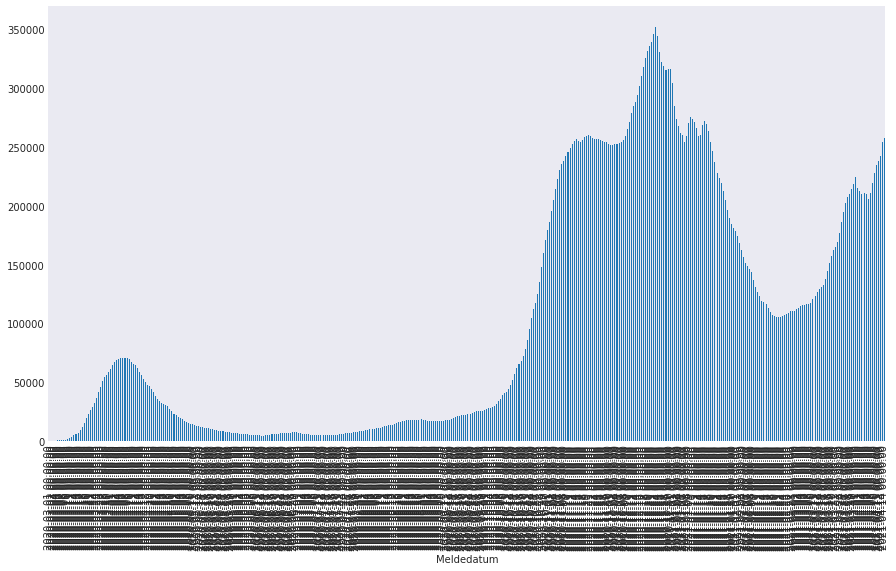

In [207]:
rki.ActiveCases['03-01-2020':].plot.bar()

<AxesSubplot:xlabel='Meldedatum'>

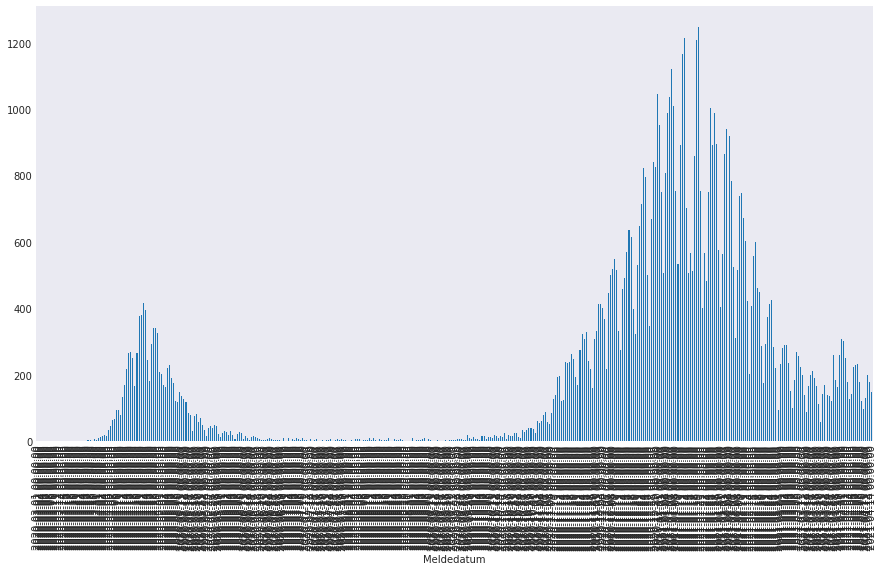

In [208]:
rki.NewDeath['03-01-2020':].plot.bar()

Text(0.5, 1.0, 'RKI recorded fatalities by PCR reporting date in Germany')

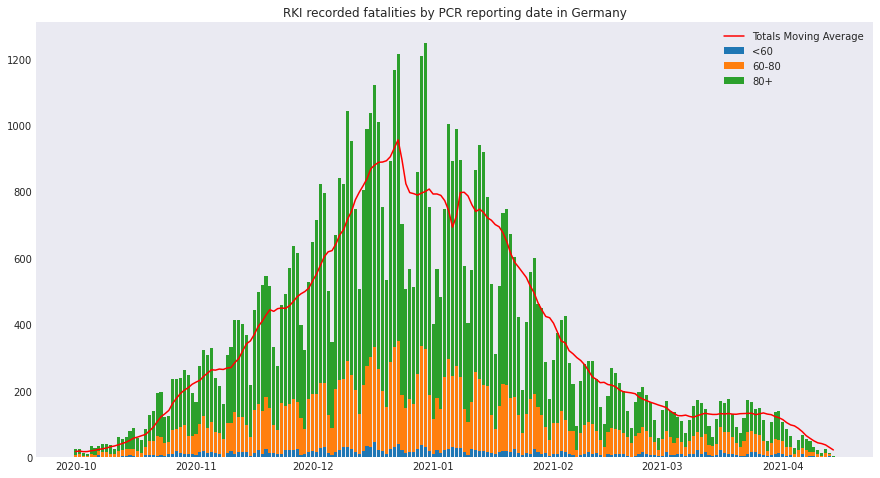

In [209]:
df = pd.DataFrame({'<60':rki_under60.NewDeathRKI, '60-80':rki_60to80.NewDeathRKI, '80+':rki80.NewDeathRKI})
df.fillna(0, inplace=True)
#df['10-01-2020':].plot.bar(label='Fatalities under 60 years', stacked=True)
start_date = '10-01-2020'
x = rki[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='<60')
offset = rki_under60.NewDeathRKI[start_date:]
plt.bar(x, rki_60to80.NewDeathRKI[start_date:], label='60-80', bottom=offset)
offset = rki_under60.NewDeathRKI[start_date:] + rki_60to80.NewDeathRKI[start_date:]
plt.bar(x, rki80.NewDeathRKI[start_date:], label='80+', bottom=offset)
#plt.bar(x, rki80.NewDeathRKI[start_date:], label='New Cases')
plt.plot(x, rki.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Totals Moving Average', color='red')
plt.legend(loc='best')
plt.title('RKI recorded fatalities by PCR reporting date in Germany')

In [210]:
age_groups_df.columns

Index(['A00-A04', 'A05-A14', 'A15-A34', 'A35-A59', 'A60-A79', 'A80+',
       'unbekannt'],
      dtype='object')

Text(0.5, 1.0, 'Growth Germany')

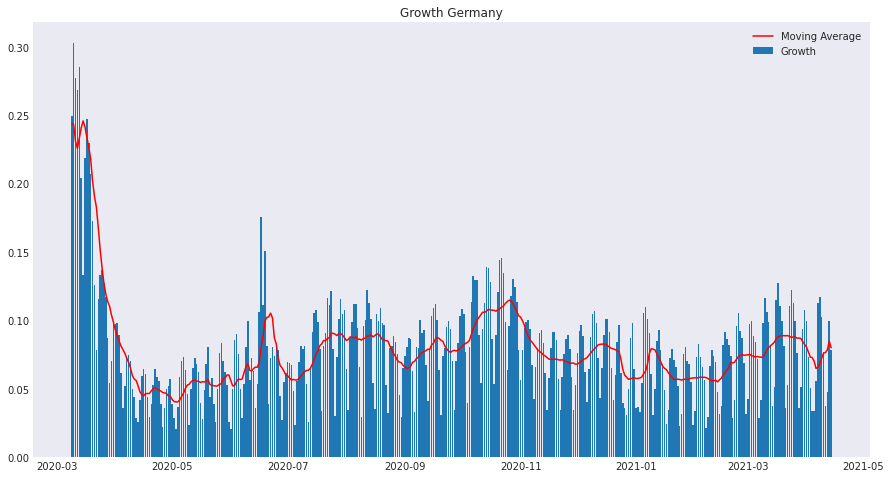

In [211]:
start_date = '03-09-2020'
x = rki[start_date:].index
plt.bar(x, rki.Growth[start_date:], label='Growth')
plt.plot(x, rki.Growth.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Growth Germany')

In [212]:
rki.tail(20)

,NewCases,NewDeathRKI,NewRecoveredRKI,Case Fatality,NewRecovered,NewDeath,Cases,Death,Recovered,ActiveCases,Growth
Meldedatum,,,,,,,,,,,
2021-03-26,20083,148.0,13953,0.736942,12397.0,258.0,2764163,75732.0,2486142.0,202289.0,0.099279
2021-03-27,15777,111.0,10635,0.703556,10399.0,183.0,2779940,75915.0,2496541.0,207484.0,0.076040
2021-03-28,7622,50.0,4964,0.655996,4810.0,163.0,2787562,76078.0,2501351.0,210133.0,0.036272
2021-03-29,11038,106.0,6959,0.960319,6696.0,259.0,2798600,76337.0,2508047.0,214216.0,0.051527
2021-03-30,20429,135.0,13373,0.660825,15642.0,307.0,2819029,76644.0,2523689.0,218696.0,0.093413
2021-03-31,24090,139.0,15867,0.577003,18231.0,303.0,2843119,76947.0,2541920.0,224252.0,0.107424
2021-04-01,21474,105.0,13724,0.488963,30280.0,249.0,2864593,77196.0,2572200.0,215197.0,0.099788
2021-04-02,15548,84.0,5596,0.540262,17858.0,179.0,2880141,77375.0,2590058.0,212708.0,0.073096
2021-04-03,10676,64.0,3430,0.599475,13560.0,126.0,2890817,77501.0,2603618.0,209698.0,0.050911


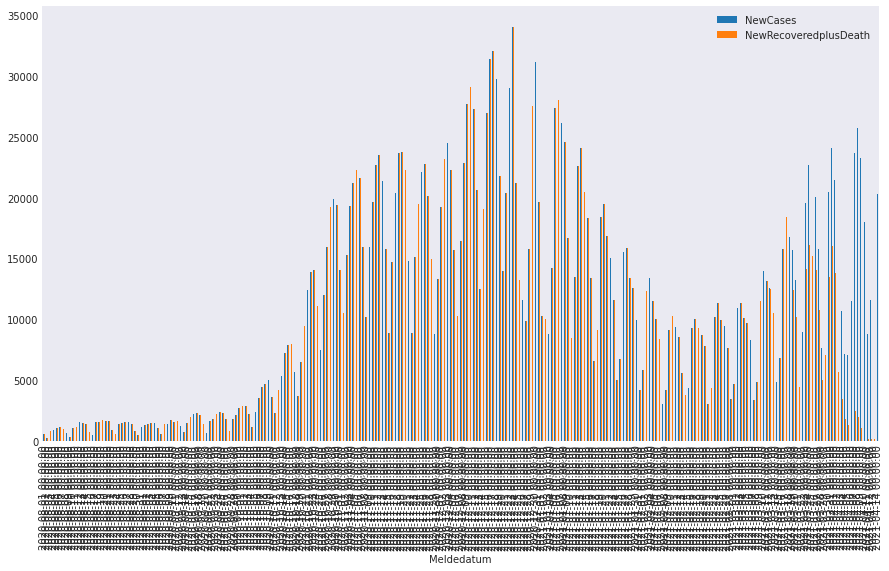

In [213]:
rki['NewRecoveredplusDeath'] = rki.NewRecoveredRKI + rki.NewDeathRKI
rki['08-01-2020':][['NewCases', 'NewRecoveredplusDeath']].plot.bar()
rki.drop('NewRecoveredplusDeath', axis=1, inplace=True)

<AxesSubplot:xlabel='Meldedatum'>

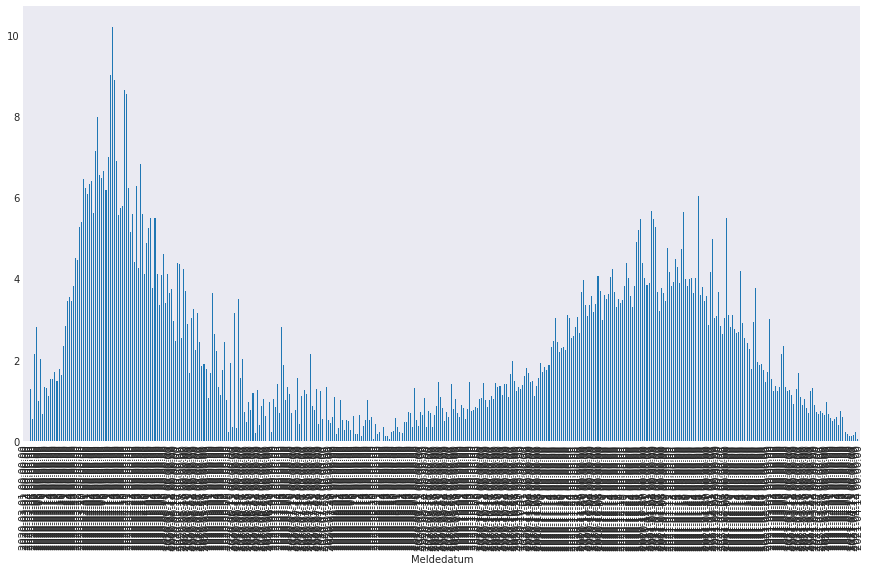

In [214]:
rki['Case Fatality']['03-01-2020':].plot.bar()

<AxesSubplot:xlabel='Meldedatum'>

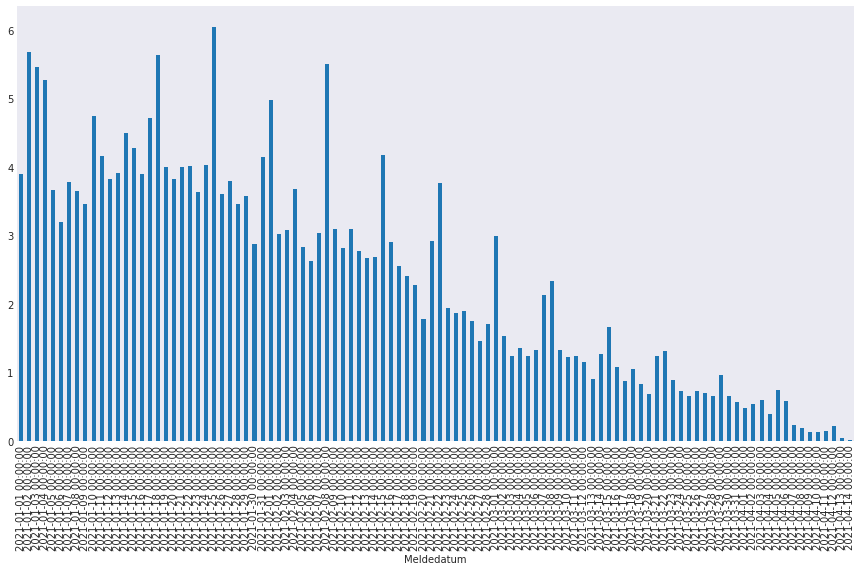

In [215]:
rki['Case Fatality']['01-01-2021':].plot.bar()

Text(0.5, 1.0, 'Case Fatality Germany (%)')

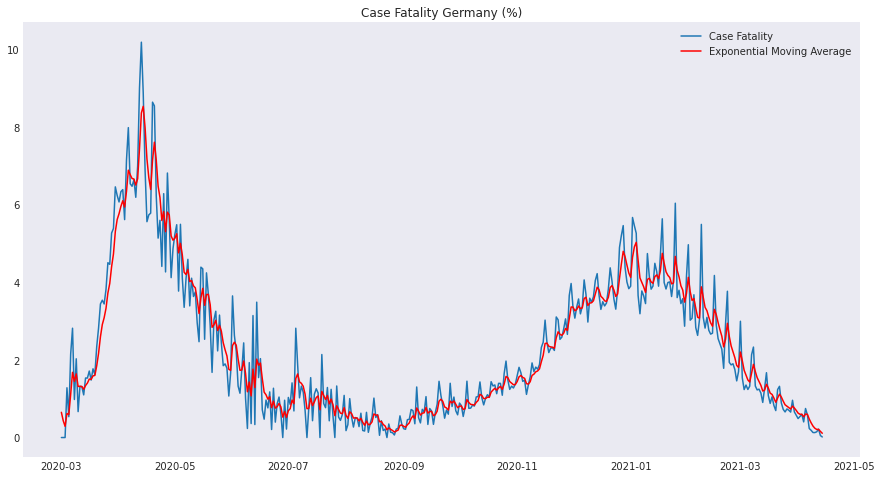

In [216]:
start_date = '03-01-2020'
x = rki[start_date:].index
plt.plot(x, rki['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki['Case Fatality'].ewm(span=5,adjust=False).mean()[start_date:], label='Exponential Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality Germany (%)')

Text(0.5, 1.0, 'Daily Covid Fatalities (PCR positive) under 60 years Germany')

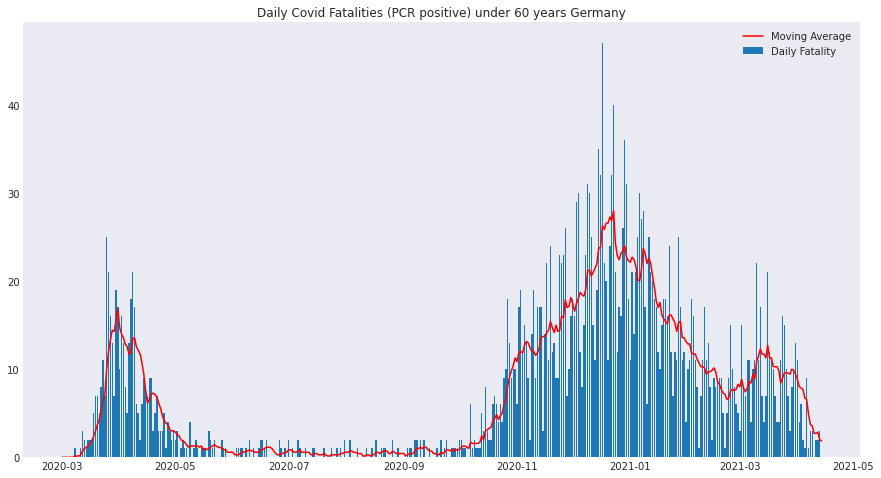

In [217]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60.NewDeathRKI[start_date:], label='Daily Fatality')
plt.plot(x, rki_under60.NewDeathRKI.rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Daily Covid Fatalities (PCR positive) under 60 years Germany')

Text(0.5, 1.0, 'Case Fatality (PCR positive) under 60 years Germany in %')

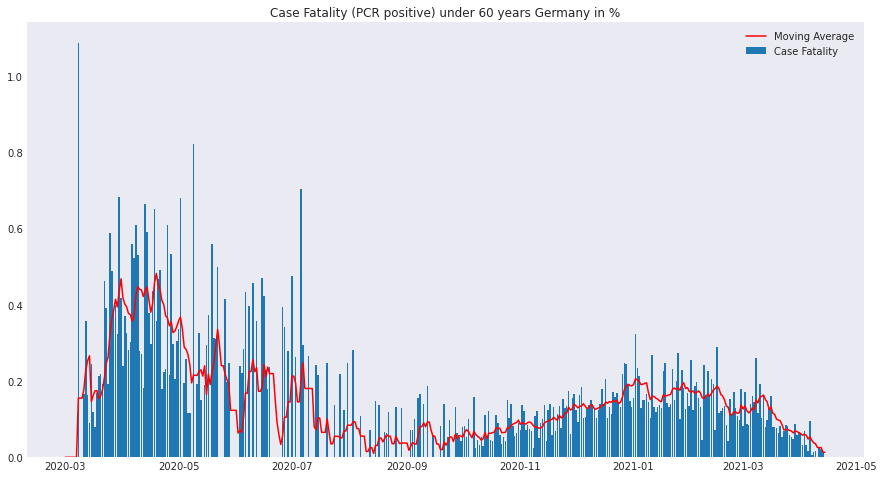

In [218]:
start_date = '03-01-2020'
x = rki_under60[start_date:].index
plt.bar(x, rki_under60['Case Fatality'][start_date:], label='Case Fatality')
plt.plot(x, rki_under60['Case Fatality'].rolling(7).sum()[start_date:] / 7, label='Moving Average', color='red')
plt.legend(loc='best')
plt.title('Case Fatality (PCR positive) under 60 years Germany in %')